In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
P = 1048573
a = random.randrange(P)
b = random.randrange(P)
c = random.randrange(P)
d = random.randrange(P)
seed = random.randrange(P)

1. ((ax + b) mod P) mod 1024 (2-universal)
2. ((ax2 + bx + c) mod P) mod 1024 (3-universal)
3. ((ax3 + bx2 + cx + d) mod P) mod 1024 (4-universal)
4. murmurhash3 with a fixed seed (use murmurhash from sklearn.utils import murmurhash3_32. Feel free to take extra mod to constrain it in range [0-1023])

In [3]:
def func_1(x):
    return bin(((a*x + b) % 1048573) % 1024)

In [4]:
def func_2(x):
    return bin(((a*(x**2) + b*x + c) % 1048573) % 1024)

In [5]:
def func_3(x):
    return bin(((a*(x**3) + b*(x**2) + c*x + d) % 1048573) % 1024)

In [6]:
from sklearn.utils import murmurhash3_32
def func_4(x):
    return bin(murmurhash3_32(x, seed) % 1024)

In [7]:
# bit_list = [bin(random.getrandbits(31))[2:] for i in range(50)]   # supposed to be in range(5000)
bit_list = [bin(random.randint(1, 2**31-1))[2:].zfill(31) for i in range(5000)]   # supposed to be in range(5000)

In [8]:
def create_matrix(hash_func):
    matrix = np.zeros((10, 31))
    for original_bits in bit_list:
        bit_int = int(original_bits, 2)
        original_output = hash_func(bit_int)[2:].zfill(10)
        for j in range(31):
            flipped_bits = original_bits
            bit_to_replace = '1' if flipped_bits[j] == '0' else '0'
            flipped_bits = flipped_bits[:j] + str(bit_to_replace) + flipped_bits[j+1:]
            flipped_int = int(flipped_bits, 2)
            flipped_output = hash_func(flipped_int)[2:].zfill(10)
            for i in range(len(original_output)):
                if (original_output[i] != flipped_output[i]):
                    matrix[i, j] += 1
    matrix = matrix / len(bit_list)
    return matrix

Text(0.5, 1.0, '5-universal function')

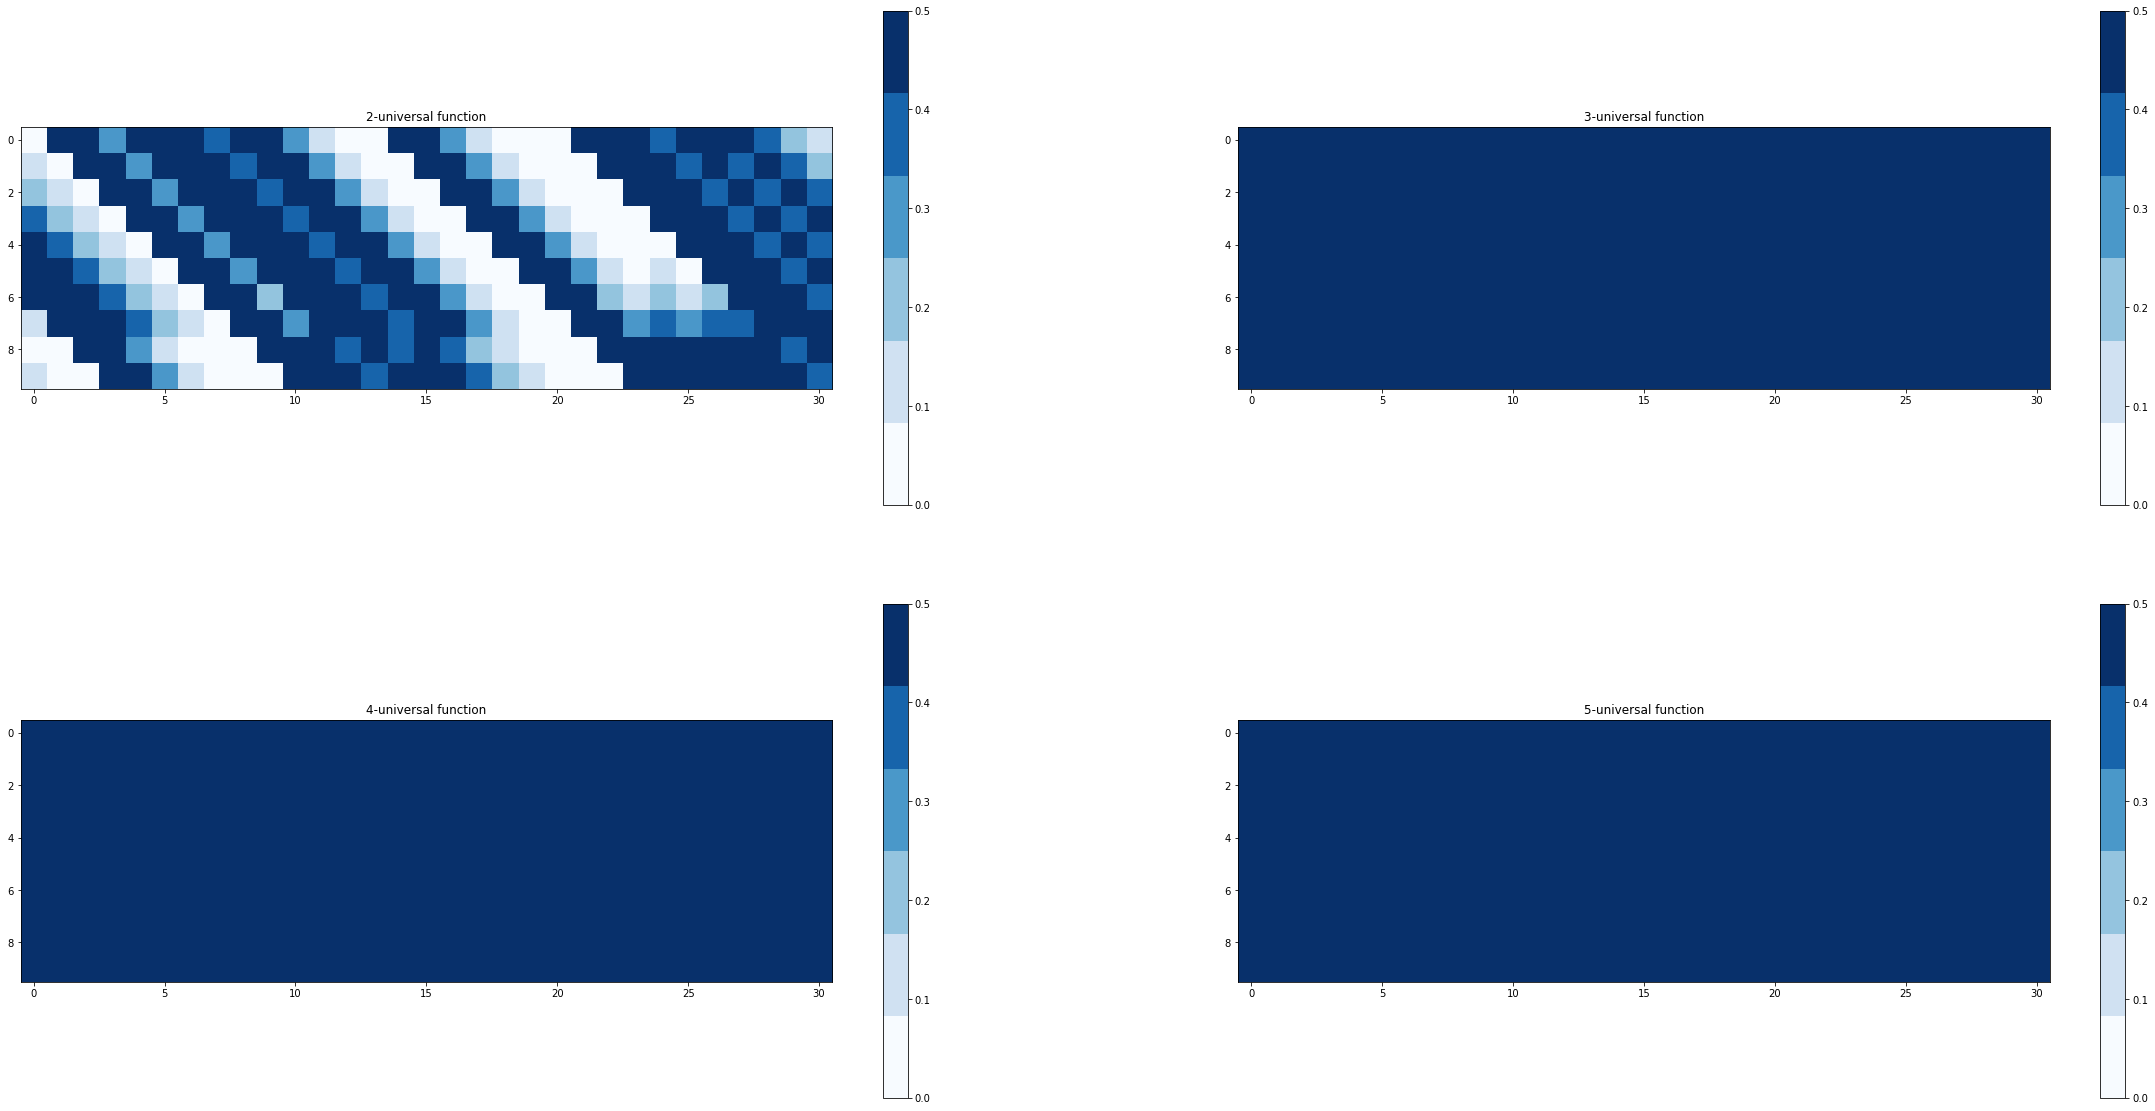

In [9]:
plt.figure(figsize=(40, 20))

plt.subplot(2, 2, 1)
hash_matrix = np.abs(create_matrix(func_1))

im = plt.imshow(hash_matrix, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(0, 0.5)
plt.title('2-universal function')

plt.subplot(2, 2, 2)
hash_matrix = np.abs(create_matrix(func_2))
plt.imshow(hash_matrix, cmap=plt.get_cmap('Blues', 6), interpolation='nearest')
plt.colorbar()
plt.clim(0, 0.5)
plt.title('3-universal function')

plt.subplot(2, 2, 3)
hash_matrix = np.abs(create_matrix(func_3))
plt.imshow(hash_matrix, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(0, 0.5)
plt.title('4-universal function')

plt.subplot(2, 2, 4)
hash_matrix = np.abs(create_matrix(func_4))
plt.imshow(hash_matrix, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(0, 0.5)
plt.title('5-universal function')


Conclusion: 
    
    As shown in the graph, the 2-universal function generates much less randomly distributed bit change. It turns out the rarely-changed bit often occurs in pair. For example, in the current grpah, for input bit position of 8 and output bit position of 10, the output bit rarely changes in comparision with other output bit positions. For input bit position of 7 and output bit position of 9, the output bit rarely changes. 
    It turns out that the probability of change is linearly dependent between input bit position and output bit position. With the same strenght of changeness, the interval between input bit position and output bit position remains relatively the same. The linear property of 2-universal hash function most likely causes this result. As input bit gets flipped and shifted in order, the change resistence of certain bit in output can be easily determined.
    In comparision with 2-universal hash function, 3-universal, 4-universal, and 5-universal hash functions do not have such performance. The probability of output bit remains 0.5 in most of time. This shows that 3-universal，4-universal and 5-universal hash functions achieve avalanche and are more desirable for cybersecurity. Every change in input bit results in a 50% change of output bit. Input bits and output bits are independent to each other: once we flip a bit in the input, we cannot determine the any bit in the output, which not only avoids collision, but also ensures security of decryption. 

4.1.1 WarmUP

In [10]:
from sklearn.utils import murmurhash3_32
import random, math

In [11]:
def hashfunc(m): 
    seed = random.randint(0, 10000)
    return (lambda x: murmurhash3_32(x, seed) % m)

In [12]:
import array
def makeBitArray(intSize, fill = 0):
    bitArray = array.array('I')          # 'I' = unsigned 32-bit integer 
    bitArray.extend((fill,) * intSize)
    return(bitArray) 

In [13]:
class BloomFilter_p3 ():
    def __init__(self, n, fp_rate):
        self.n = n
        self.fp_rate = fp_rate
        self.R = math.ceil(n * math.log(fp_rate, 0.618))
        self.k = math.ceil(math.log(fp_rate, 0.618)  * math.log(2))
        self.bitArray = makeBitArray(self.R)        
        self.hashfunc_list = [hashfunc(self.R) for i in range(self.k)]
    def insert(self, key):
        for hashfunc in self.hashfunc_list:
            bitnum = hashfunc(key)
            if self.bitArray[bitnum] == 0:
                self.bitArray[bitnum] = 1
                
    def test(self, key):
        for hashfunc in self.hashfunc_list:
            bitnum = hashfunc(key)
            if self.bitArray[bitnum] == 0:
                return False
        return True

In [14]:
# generate train and test dataset
membership_num = 10000
test_num = 1000
test_lst = random.sample(range(10000, 100000), test_num)
non_test_lst = [x for x in range(10000, 100000) if x not in test_lst]
membership_lst = random.sample(random.sample(non_test_lst, membership_num), membership_num)

In [15]:
# implement bloom filter for all fp_rate
fp_rate_list = [0.01, 0.001, 0.0001]
for fp_rate in fp_rate_list:
    blm_filter = BloomFilter_p3(membership_num, fp_rate)
    for mem_data in membership_lst:
        blm_filter.insert(mem_data)
    fp_cnt = 0
    for test_data in test_lst:
        fp_cnt += blm_filter.test(test_data)
    print('desired_fp_rate: ', fp_rate, 'real_fp_rate', fp_cnt * 1.0 / test_num)

desired_fp_rate:  0.01 real_fp_rate 0.007
desired_fp_rate:  0.001 real_fp_rate 0.001
desired_fp_rate:  0.0001 real_fp_rate 0.0


4.2.2

TODO: generate 1000 number in the training!!!!!!

In [16]:
import csv
import pandas as pd
import string
import sys
from collections import defaultdict

In [17]:
data = pd.read_csv('user-ct-test-collection-01.txt', sep="\t")
urllist = data.ClickURL.dropna().unique()

In [18]:
membership_lst = list(urllist)

In [19]:
membership_num = len(membership_lst)

In [20]:
membership_num

377870

In [21]:
test_num = 1000
membership_num = len(membership_lst)
url_membership_test_positive = random.sample(membership_lst, test_num)
url_membership_test_negative = [''.join(random.choices(string.ascii_lowercase + string.digits, k = random.randint(2, 20))) 
                                for i in range(test_num)]

In [22]:
class BloomFilter_p4():
    def __init__(self, n, R):
        self.n = n
        self.R = R
        self.k = math.ceil(0.7 * R / n)
        self.hashfunc_list = [hashfunc(self.R) for i in range(self.k)]
        self.bitArray = makeBitArray(self.R)        
        self.hashfunc_list = [hashfunc(self.R) for i in range(self.k)]
        
    def insert(self, key):
        for hashfunc in self.hashfunc_list:
            bitnum = hashfunc(key)
            if self.bitArray[bitnum] == 0:
                self.bitArray[bitnum] = 1
                
    def test(self, key):
        for hashfunc in self.hashfunc_list:
            bitnum = hashfunc(key)
            if self.bitArray[bitnum] == 0:
                return False
        return True

In [23]:
# implement bloom filter for all fp_rate
R_list = range(0, 4000000, 500000)
fp_rates_lst =[]
memory_lst = []
for r in R_list:
    blm_filter = BloomFilter_p4(membership_num, r)
    for mem_data in membership_lst:
        blm_filter.insert(mem_data)
    fp_cnt = 0
    for test_data in url_membership_test_negative:
        fp_cnt += blm_filter.test(test_data)
    fp_rates_lst.append(fp_cnt * 1.0 / test_num)
    memory_lst.append(sys.getsizeof(blm_filter.bitArray))

In [24]:
# blm_filter = BloomFilter_p4(membership_num, 4000000)
# for mem_data in membership_lst:
#     blm_filter.insert(mem_data)
# fp_cnt = 0
# for test_data in url_membership_test_negative:
#     fp_cnt += blm_filter.test(test_data)
# print(fp_cnt * 1.0 / test_num)

In [32]:
log2_R_list = [0]
log2_R_list.extend(math.log2(r) for r in R_list[1:])

Text(0, 0.5, 'false positive rate')

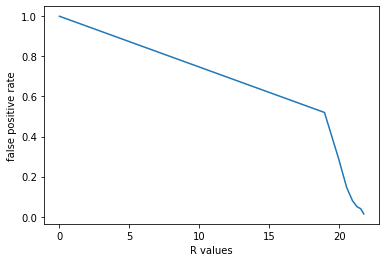

In [33]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(log2_R_list, fp_rates_lst)
plt.xlabel('R values')
plt.ylabel('false positive rate')

False position rates decrease exponentially as R increases. As it stores more things in the bit array, elements get harder to collide with each other, and the probability to falsely compute result decrease dramtically. Also, theroriatically, fp = 0.618^R/n, fp is inversely related with R. 

Text(0, 0.5, 'memory')

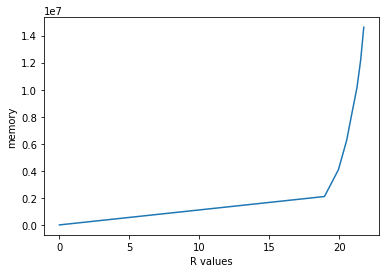

In [34]:
plt.plot(log2_R_list, memory_lst)
plt.xlabel('R values')
plt.ylabel('memory')
# for i in range(len(R_list)):
#     print(R_list[i], memory_lst[i])
#     print(R_list[i] / memory_lst[i])
#     M = R / 8

As shown in the graph, the relationship between R values and memory is linear. As r increase, the memory size of bitmap increase linearly. 
Reasoning: our bloom filter is an array of R bits, as R increases, the bloom filter stores more things. 

In [35]:
hashtable = defaultdict(int)
for url in membership_lst:
    hashtable[url] = 1
print("Memory size of hash table:")
sys.getsizeof(hashtable)

Memory size of hash table:


20971616